# Pandas
- Analyze 2D or multi dimensional data
- Table like data
- Internally they use numpy

In [2]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Creating data

- dictionaries
- import csv files

final data will be a dataframe(table)

In [3]:
import pandas as pd

In [4]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 34, 29, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}
data

{'Name': ['John', 'Anna', 'Peter', 'Linda'],
 'Age': [28, 34, 29, 32],
 'City': ['New York', 'Paris', 'Berlin', 'London']}

In [5]:
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris
2,Peter,29,Berlin
3,Linda,32,London


## Filtering columns

``` SQL
SELECT name FROM df
```

In [6]:
df["Name"]

0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object

In [7]:
type(df)
type(df["Name"])

pandas.core.series.Series

In [8]:
df.head(2) # Filtering the rows

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris


## Info about data

Feel for the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [10]:
df.shape # (4,3)
df.dtypes #datatypes

Name    object
Age      int64
City    object
dtype: object

In [11]:
df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [12]:
df.describe() # Only numeric columns
df.describe(include="all") # Object and numeric columns

,Name,Age,City
count,4,4.000000,4
unique,4,NaN,4
top,John,NaN,New York
freq,1,NaN,1
mean,NaN,30.750000,NaN
std,NaN,2.753785,NaN
min,NaN,28.000000,NaN
25%,NaN,28.750000,NaN
50%,NaN,30.500000,NaN
75%,NaN,32.500000,NaN


In [13]:
tips_df = pd.read_csv("tips.csv")
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
selected_columns = tips_df[["day", "time", "tip"]]
selected_columns

,day,time,tip
0,Sun,Dinner,1.01
1,Sun,Dinner,1.66
2,Sun,Dinner,3.50
3,Sun,Dinner,3.31
4,Sun,Dinner,3.61
...,...,...,...
239,Sat,Dinner,5.92
240,Sat,Dinner,2.00
241,Sat,Dinner,2.00
242,Sat,Dinner,1.75


In [16]:
tips_df[["day", "size"]].head(5)
tips_df["tips_per_person"] = tips_df["tip"] / tips_df["size"] # Add a new column to the dataframe
tips_df.head(5)
tips_df.tail(10)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person
234,15.53,3.00,Male,Yes,Sat,Dinner,2,1.500000
235,10.07,1.25,Male,No,Sat,Dinner,2,0.625000
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.500000
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.585000
238,35.83,4.67,Female,No,Sat,Dinner,3,1.556667
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000
243,18.78,3.00,Female,No,Thur,Dinner,2,1.500000


## Find how much percentage of the bill people are tipping
- Percentage
- Add it as another column - tip_percentage
- Round off to 2 decimal points

In [17]:
tips_df["tip_percentage"] = round((tips_df["tip"] / tips_df["total_bill"]) * 100, 2)
tips_df.sort_values(by="total_bill")
tips_df.sort_values(by="tip_percentage", ascending=False).head(10)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.575,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,2.000,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.000,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,1.695,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1.625,28.05
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000,27.95
149,7.51,2.00,Male,No,Thur,Lunch,2,1.000,26.63
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.150,26.35
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.740,25.93
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300,25.27


## Task 1
Filter the rows where people dined on a Sunday

In [18]:
sunday_diners = tips_df[tips_df["day"] == "Sun"]
sunday_diners

tips_df[tips_df["day"] == "Sun"].shape[0] # rows
tips_df[tips_df["day"] == "Sun"].shape[1] # columns

9

## Task 2
Get the rows where people have tipped more than R10 and on a Friday

```SQL
SELECT * FROM tips_df WHERE day  = "Fri" and tip > 3
```

In [19]:
print((tips_df["tip"] > 3).value_counts()) # Counts the similiar item and sorts in descending


tip
False    146
True      98
Name: count, dtype: int64


In [20]:
# & --> and | --> or
# Binary operator
filtered_rows = tips_df[(tips_df["tip"] > 3) & (tips_df["day"] == "Fri")]
filtered_rows

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
94,22.75,3.25,Female,No,Fri,Dinner,2,1.6250,14.29
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


## Task 3
Extended task 2, give the top 5 tips on that Friday

In [21]:
filtered_rows.sort_values(by="tip", ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


## Task 4
Rows where - Large parties: people are 5 or more or where R35 or more was spent

In [22]:
# Dot syntax
tips_df.tip
tips_df.smoker

#Box syntax
tips_df[(tips_df["size"] >= 5) | (tips_df["total_bill"] >= 35)] # --> size attribute all df or space in the column name

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
11,35.26,5.00,Female,No,Sun,Dinner,4,1.250000,14.18
23,39.42,7.58,Male,No,Sat,Dinner,4,1.895000,19.23
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.750000,7.89
59,48.27,6.73,Male,No,Sat,Dinner,4,1.682500,13.94
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.182500,11.77
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64
112,38.07,4.00,Male,No,Sun,Dinner,3,1.333333,10.51
125,29.80,4.20,Female,No,Thur,Lunch,6,0.700000,14.09
141,34.30,6.70,Male,No,Thur,Lunch,6,1.116667,19.53
142,41.19,5.00,Male,No,Thur,Lunch,5,1.000000,12.14


## Data Exploration

## Summarization

- Filter rows, columns
- head, tail - limit
- sort_values
- Conditionals with operators


## Slicing in Pandas
- loc
- iloc - index

In [23]:
tips_df.head(6)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,1.177500,18.62


In [24]:
tips_df.iloc[3]
tips_df.iloc[3:5]



,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68


In [25]:
tips_df.loc[3]
tips_df.loc[3:5]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,1.1775,18.62


In [26]:
# tips_df.tail(6).loc[1] #error
tips_df.tail(6).loc[239] # match the value and not the row position
# print(tips_df.tail(6))
tips_df.tail(6).iloc[2:4] # row position

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
240,27.18,2.0,Female,Yes,Sat,Dinner,2,1.0,7.36
241,22.67,2.0,Male,Yes,Sat,Dinner,2,1.0,8.82


In [27]:
tips_df.tail(6).loc[239:241, "tip"]
tips_df.tail(6).loc[239:241,["tip", "size"]]
tips_df.tail(6).loc[239:241, "tip":"day"]

,tip,sex,smoker,day
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat


In [28]:
tips_df.tail(6).iloc[2:4, 1:5]

tips_df.tail(6).iloc[2:4].loc[:,"tip":"day"]

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


## Task 1
Find the rows with the highest tip_percentage on the weekens(Sat and Sun) skip the first 5 results

In [29]:
weekend_tips = tips_df[(tips_df["day"] == "Sat") | (tips_df["day"] == "Sun")]

sorted_weekend_tips = weekend_tips.sort_values(by="tip_percentage", ascending=False)
highest_weekend_tips = sorted_weekend_tips.iloc[5:]
highest_weekend_tips

#OR
tips_df[(tips_df['day'] == "Sat") | (tips_df['day'] == 'Sun')].sort_values(by="tip_percentage",ascending=False).iloc[5:]

#OR
tips_df[tips_df["day"].isin(["Sun", "Sat"])].sort_values(by="tip_percentage",ascending=False).iloc[5:]


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percentage
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.95
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.27
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.22
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.17
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.78
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64


## Task 2 
Final result should only include tip_percentage, day, tip, total_bill

In [30]:
tips = highest_weekend_tips[["tip_percentage", "day", "tip", "total_bill"]]

## Task 3
Filter tips_df.tail(6) rows on 2:4 index and columns "tip":"day"

In [31]:
tips_df.tail(6).iloc[2:4].loc[:,"tip":"day"]

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


## Statistics
- mean
- median
- sum

In [32]:
tips_df["tip"].mean()
tips_df["tip"].median()
tips_df["tip"].sum()

tips_df[["total_bill", "tip"]].mean()
tips_df[["total_bill", "tip"]].median()
tips_df[["total_bill", "tip"]].sum()
tips_df[["total_bill", "tip"]].mode()
tips_df[["total_bill", "tip"]].max()
tips_df[["total_bill", "tip"]].min()

total_bill    3.07
tip           1.00
dtype: float64

## Task 
Calculate average total_bill for each day

# Summarizing

- Bread and butter



# Task

Average total_bill on each day

```SQL
SELECT day, AVG(total_bill) AS average_total_bill 
FROM tips_df 
GROUP BY day;
```

In [33]:
tips_df.groupby("day")["total_bill"].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

## Task 2.1
Who leaves more total tip, smoker or non smoker by total

In [34]:
total_tip_by_smoker = tips_df.groupby('smoker')['tip'].sum()
total_tip_by_smoker

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

## Task 2.2
Who leaves more total tip, smoker or non smoker by average

In [35]:
average_tip_by_smoker = tips_df.groupby('smoker')['tip'].mean()
average_tip_by_smoker

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

## Aggregate
In one go I can visualize multiple summaries

In [36]:
tips_df.groupby("smoker").aggregate({"tip":["sum", "mean"], "total_bill":"mean"})

tip           total_bill
           sum      mean       mean
smoker                             
No      451.77  2.991854  19.188278
Yes     279.81  3.008710  20.756344

## Task 3
Based on the day get the sum of total_bill for each day and calculate the average tip_percent

In [37]:
tips_df.groupby("day").aggregate({"total_bill": "sum","tip_percentage": "mean"})

,total_bill,tip_percentage
day,,
Fri,325.88,16.991579
Sat,1778.40,15.314598
Sun,1627.16,16.689605
Thur,1096.33,16.126452


## One more level of drilling


In [38]:
tips_df.groupby(["smoker", "day"])['tip'].mean()

smoker  day 
No      Fri     2.812500
        Sat     3.102889
        Sun     3.167895
        Thur    2.673778
Yes     Fri     2.714000
        Sat     2.875476
        Sun     3.516842
        Thur    3.030000
Name: tip, dtype: float64

## Task 1
On average who earns more tips each day, male or female

## Unstack
Transforms the result and makes it easier to analyze (It pulls out the aggregate columns and puts it into separate columns)

In [39]:
tips_df.groupby(["sex", "day"])['tip'].mean().unstack()


day,Fri,Sat,Sun,Thur
sex,,,,
Female,2.781111,2.801786,3.367222,2.575625
Male,2.693000,3.083898,3.220345,2.980333


In [40]:
tips_df.groupby(["day", "sex"])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


## Task 2
On average, max, min who earns more tips each day, male or female

In [42]:
tips_df.groupby(["day", "sex"]).aggregate({"tip": ["mean", "max", "min"]}).unstack()


tip                                     
          mean              max           min      
sex     Female      Male Female   Male Female  Male
day                                                
Fri   2.781111  2.693000   4.30   4.73   1.00  1.50
Sat   2.801786  3.083898   6.50  10.00   1.00  1.00
Sun   3.367222  3.220345   5.20   6.50   1.01  1.32
Thur  2.575625  2.980333   5.17   6.70   1.25  1.44

In [43]:
pd.pivot_table(tips_df, index="day", columns="smoker", values="tip", aggfunc="sum")

smoker,No,Yes
day,,
Fri,11.25,40.71
Sat,139.63,120.77
Sun,180.57,66.82
Thur,120.32,51.51


## Visualize
- Matlpot
    - Pioneer
    - Beginner friendly
- Seaborn
    - Internally uses matplot
    - Complex Visualization easily

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

## Bar Graph
Average total bill by day

Text(0.5, 1.0, 'Average Tips in the week')

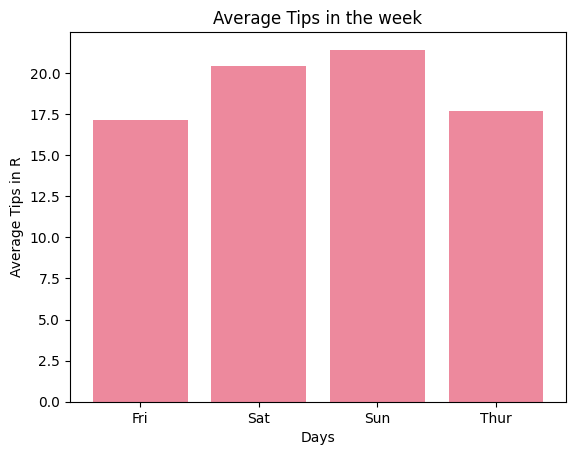

In [56]:
# x-axis = day
# y-axis = average

# x_days = tips_df["day"].unique()
y_avg_total_bill = tips_df.groupby("day")["total_bill"].mean()
x_days = y_avg_total_bill.index

# plt.bar(x_days, y_avg_total_bill, color="crimson")

plt.bar(x_days, y_avg_total_bill, color="crimson", alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Average Tips in R")
plt.title("Average Tips in the week")

<Axes: title={'center': 'Averge Tips in the week'}, xlabel='Days', ylabel='Average Tips in R'>

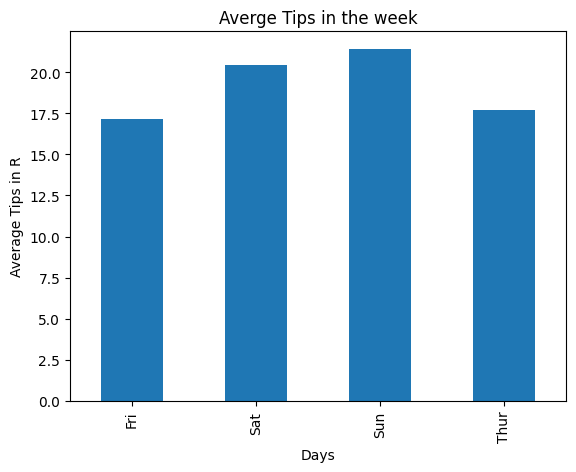

In [59]:
y_avg_total_bill = tips_df.groupby("day")["total_bill"].mean()
x_days = y_avg_total_bill.index

#Series
y_avg_total_bill.plot(kind="bar", xlabel="Days", ylabel="Average Tips in R", title="Averge Tips in the week")

<Axes: title={'center': 'Averge Tips in the week'}, ylabel='total_bill'>

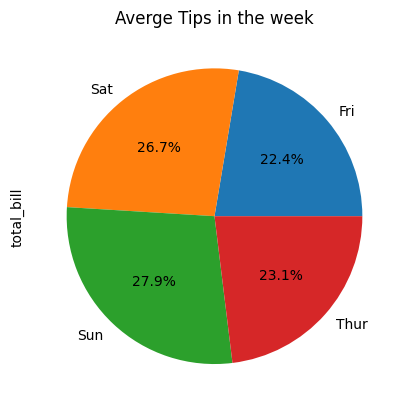

In [63]:
y_avg_total_bill.plot(kind="pie", autopct="%1.1f%%", title="Averge Tips in the week")

## Task
Create a pie chart comparing how many times people have visited at different times of the day (dinner, Luncg)

In [ ]:
tips_df

time
Dinner    176
Lunch      68
Name: count, dtype: int64


<Axes: title={'center': 'Proportion Of Meals'}, ylabel='count'>

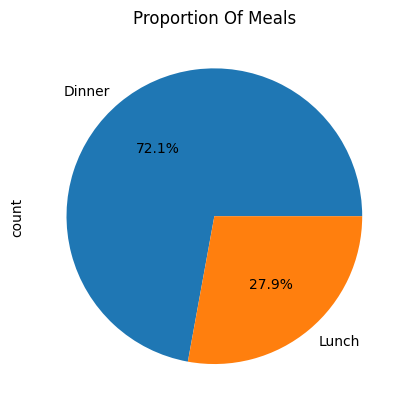

In [72]:
different_times = tips_df['time'].value_counts()
print(different_times)
different_times.plot(kind="pie", autopct='%1.1f%%', title="Proportion Of Meals")

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

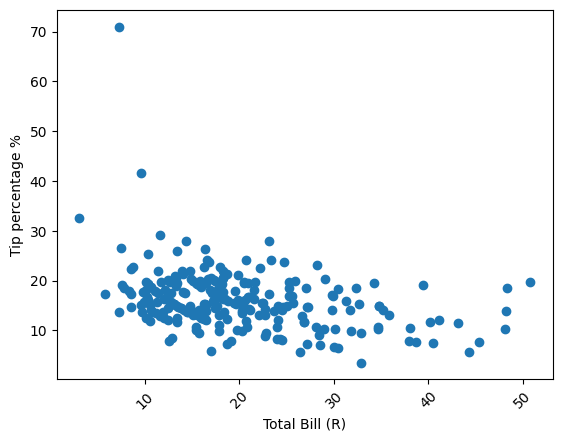

In [76]:
# y-tip_percent vs x-total_bill

plt.scatter(tips_df["total_bill"], tips_df["tip_percentage"])
plt.xlabel("Total Bill (R)")
plt.ylabel("Tip percentage %")
plt.xticks(rotation=45)

### Ticket size 
- How big or small order size is

Ticket size - Total_bill: x-axis vs frequency: y-axis

Text(0, 0.5, 'Frequency')

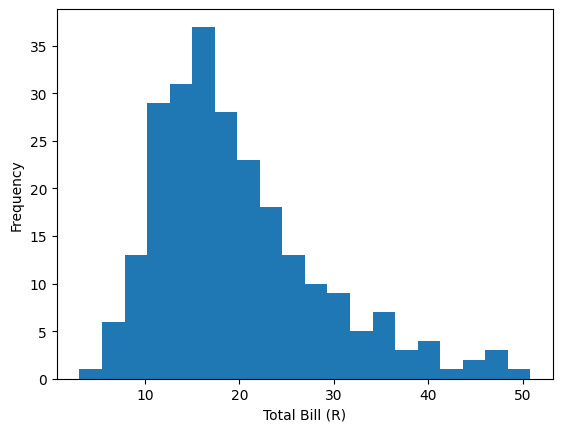

In [85]:
plt.hist(tips_df["total_bill"], bins=20)
plt.xlabel("Total Bill (R)")
plt.ylabel("Frequency")

C:\Users\E1005278\AppData\Local\Temp\ipykernel_12304\1735248553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="total_bill", data = tips_df, palette="pastel")


Text(0.5, 1.0, 'Average sales in the week')

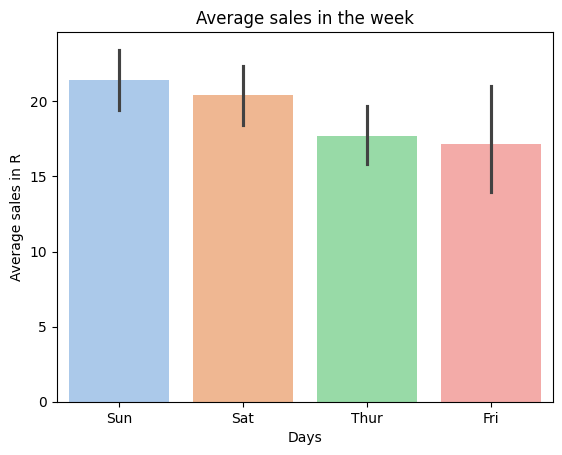

In [88]:
# x: day vs y: total_bill

# Average is automatically done of average total_bill vs each day
sns.barplot(x="day", y="total_bill", data = tips_df, palette="pastel")
plt.xlabel("Days")
plt.ylabel("Average sales in R")
plt.title("Average sales in the week")

Text(0, 0.5, 'Tip (R)')

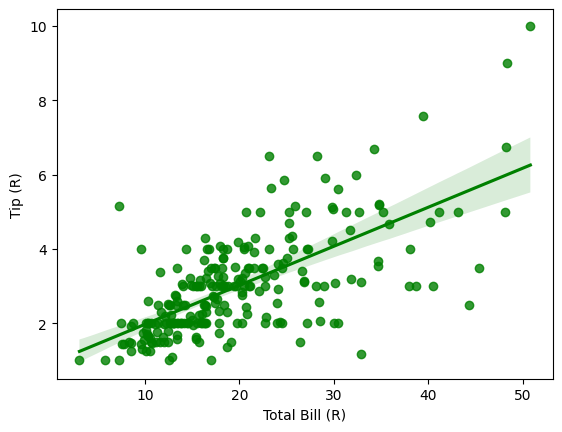

In [91]:
sns.regplot(x="total_bill", y="tip", data=tips_df, color="green")
plt.xlabel("Total Bill (R)")
plt.ylabel("Tip (R)")